In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from src.dataset import read_folder
from src.visualization import plot_img
from src.visualization import plot_landmarks_color

# Load example data

In [3]:
PATH = '../LaPa/examples'

In [4]:
images = read_folder(PATH, n = None, labels = 'labels', landmarks= 'landmarks', RGB = True)

In [5]:
example_img = list(images.keys())[3]

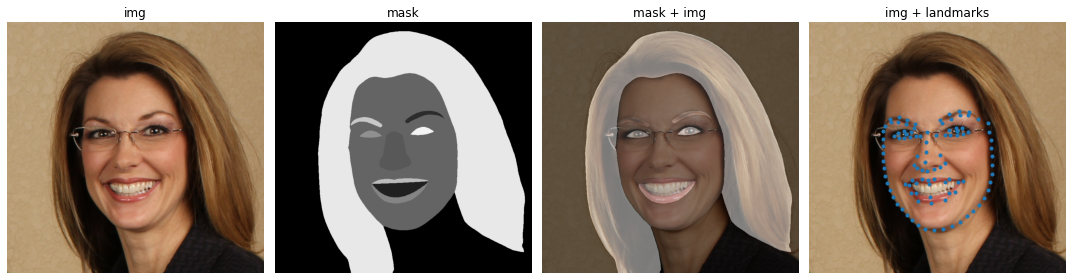

In [13]:
f, ax = plt.subplots(1,4, figsize=(15,7))
ax[0].imshow(images[example_img]['img'])
ax[0].set_title('img')
ax[0].axis('off')

ax[1].imshow(images[example_img]['labels']*100)
ax[1].set_title('mask')
ax[1].axis('off')

ax[2].imshow(images[example_img]['img'])
ax[2].imshow(images[example_img]['labels']*50, alpha = 0.5)
ax[2].set_title('mask + img')
ax[2].axis('off')

ax[3].imshow(images[example_img]['img'])
ax[3].plot(images[example_img]['landmarks']()[:,0] , images[example_img]['landmarks']()[:,1], '.')
ax[3].axis('off')
ax[3].set_title('img + landmarks')
plt.tight_layout()
plt.show()

# Landmarks

In [14]:
LEFT_FACE_SIDE = images[example_img]['landmarks'].points_info['LEFT_FACE_SIDE']
REIGHT_FACE_SIDE = images[example_img]['landmarks'].points_info['REIGHT_FACE_SIDE']
SYMMETRY_LINE = images[example_img]['landmarks'].symmetry_line

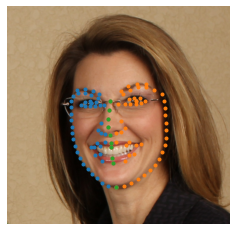

In [15]:
plot_img(images[example_img]['img'])
plt.plot(images[example_img]['landmarks']()[LEFT_FACE_SIDE, 0] , images[example_img]['landmarks']()[LEFT_FACE_SIDE, 1], '.')
plt.plot(images[example_img]['landmarks']()[REIGHT_FACE_SIDE, 0] , images[example_img]['landmarks']()[REIGHT_FACE_SIDE, 1], '.')
plt.plot(images[example_img]['landmarks']()[SYMMETRY_LINE, 0] , images[example_img]['landmarks']()[SYMMETRY_LINE, 1], '.')

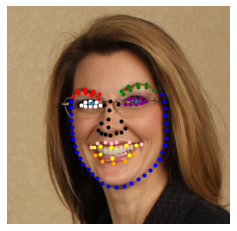

In [16]:
plot_img(images[example_img]['img'])
plot_landmarks_color(images[example_img]['landmarks'])

# Mask - labels

In [35]:
def plot_img_with_labels(images_sets, classes_idexes, images_idxes = 3):
    #The masks of CelebAMask-HQ were manually-annotated with 19 classes.
    n = images_idxes
    m = len(classes_idexes)
    fig, axs = plt.subplots(n, m + 2, figsize = (16, (-1/5*m + 4) * n))
    i = 0
    for k in list(images_sets.keys())[:images_idxes]:
        plot_img(images_sets[k]['img'], ax = axs[i][0])
        mask = images_sets[k]['labels']
        plot_img(mask * 100, ax = axs[i][1], title = f'mask')
        for j in range(m):
            plot_img(np.where(mask==classes_idexes[j], mask * 100, np.zeros_like(mask)), 
                     ax = axs[i][j+2], title = f'class = {classes_idexes[j]}')
        i += 1
        

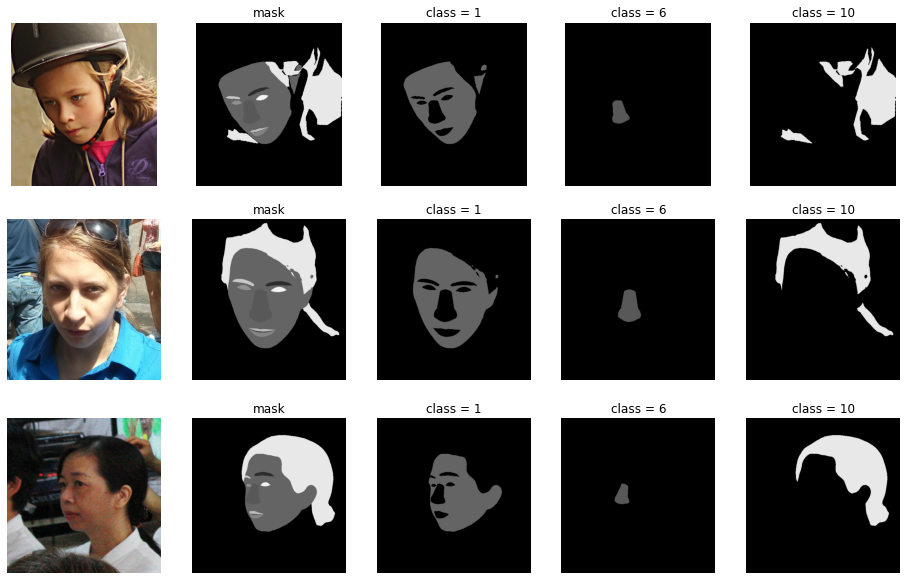

In [38]:
plot_img_with_labels(images_sets = images, classes_idexes = [1, 6, 10])